In [1]:
import sympy as sp
import pint
import numpy as np
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity

# Problem 1

In [2]:
gam  = sp.Symbol(r'\gamma',real=True,positive=True)
beta = sp.Symbol(r'\beta',real=True,positive=True)
lig  = sp.Symbol(r'\lambda_{i}^{\gamma}',real=True,positive=True)
lfg  = sp.Symbol(r'\lambda_{f}^{\gamma}',real=True,positive=True)
th   = sp.Symbol(r'\theta',real=True,positive=True)

le   = sp.Symbol(r'\lambda_e',real=True,positive=True)

pi = sp.Symbol('p_i',real=True,positive=True)
pig = sp.Symbol(r'p_i^{\gamma}',real=True,positive=True)
m  = sp.Symbol('m',real=True,positive=True)
h  = sp.Symbol('h',real=True,positive=True)
c  = sp.Symbol('c',real=True,positive=True)

In [3]:
left = gam*(lfg*(1 + beta*(sp.cos(th) - beta)/(1 - beta*sp.cos(th))) - lig*(1+beta))
right = le*(1 - (sp.cos(th) - beta)/(1 - beta*sp.cos(th)))

sol = sp.solve(sp.Eq(left,right),lfg)[0]
sol = sol.subs(beta,sp.sqrt(1-1/gam**2)).simplify()
sol = sol.subs(gam,sp.sqrt(1+(pi/(m*c))**2)).simplify()

sol = sol.subs(le,h/(m*c)).simplify() - lig
sol.subs(h,lig*pig).simplify().factor(1-sp.cos(th))

\lambda_{i}^{\gamma}*(p_i*cos(\theta) - p_i + p_i^{\gamma}*cos(\theta) - p_i^{\gamma})/(p_i - sqrt(c**2*m**2 + p_i**2))

# Problem 2

In [4]:
M,m = sp.symbols('M m',real=True,positive=True)
v = sp.Symbol('v',real=True,positive=True)
vp = sp.Symbol('v\'',real=True)

left = M**2*(v-vp)**2/m
right = M*(v**2-vp**2)

In [5]:
expr = left - right
# display(expr.expand())
sol = sp.solve(expr,vp)
for _ in sol:
    display(_)

v

v*(M - m)/(M + m)

In [6]:
v = Q_(2.1e9,'cm/s')
e = Q_(1.602e-19,'C')
eps0 = Q_(8.854e-12,'F/m')
mp = Q_(1.67e-27,'kg')
m = 4*mp

q = e**2/(np.pi*eps0*m*v**2)
q.to('cm')

3.1319915466784405e-14 <Unit('centimeter')>

# Problem 3

In [35]:
e = Q_(np.sqrt(2.3e-19),'g**0.5*cm**1.5/s')
m = Q_(9.1e-31,'kg')
c = Q_(3e8,'m/s')
R = Q_(1e-8,'cm')

T = 2*np.pi*np.sqrt(R**3*m/e**2)
print(T.to('s'))

tau = m**2*c**3*R**3/4/e**4
print(tau.to('s'))

print((T/tau).to(''))

3.9521793668571e-16 second
1.0566493383742911e-10 second
3.7402941764367446e-06 dimensionless


# Problem 4

In [37]:
e = Q_(np.sqrt(2.3e-19),'g**0.5*cm**1.5/s')
m = Q_(9.1e-31,'kg')
hbar = Q_(1.05e-34,'J*s')

q = e**4*m/2/hbar**2
q.to('eV')

13.626304096846564 <Unit('electron_volt')>

# Problem 4

In [46]:
h = Q_(6.26e-34,'J*s')
M = Q_(1.67e-24,'g')
E = Q_(1.3e-13,'erg')
R = Q_(1e-13,'cm')
c = Q_(3e10,'cm/s')

q = 2*h/np.sqrt(2*M*E)
print(q.to('cm'))

q = h**2/(2*M*R**2)
print(q.to('erg')*1e3)
print(q.to('eV')/1e9)
print(np.sqrt(2*q/M).to('cm/s')/Q_(3e10,'cm/s'))

q = np.sqrt(1 + (h/M/c)**2/R**2)*M*c**2
print(q.to('erg')*1e3)
print(q.to('eV')/1e9)

1.9000254549920345e-08 centimeter
1.1732814371257483 erg
0.7323046736716723 electron_volt
1.249500998003992 dimensionless
2.405388326237574 erg
1.5013253065813807 electron_volt


# Amelia

In [17]:
import matplotlib.pyplot as plt

In [30]:
a,b,xbar = sp.symbols(r'a b \bar{x}')

eq1 = 100 - (a*xbar**2 + b*xbar)
eq2 = 133 - (a*(100)**2 + b*100)
sol = sp.solve([eq1,eq2],a,b)

display(sp.Eq(a,sol[a]))
display(sp.Eq(b,sol[b]))

x = sp.symbols('x')
f = sol[a]*x**2 + sol[b]*x
f_num = sp.lambdify((x,xbar),f,'numpy')

Eq(a, (10000 - 133*\bar{x})/(100*\bar{x}**2 - 10000*\bar{x}))

Eq(b, (133*\bar{x}**2 - 1000000)/(100*\bar{x}**2 - 10000*\bar{x}))

In [33]:
display(sol[a].subs(xbar,81).evalf())
display(sol[b].subs(xbar,81).evalf())

0.00502274204028590

0.827725795971410

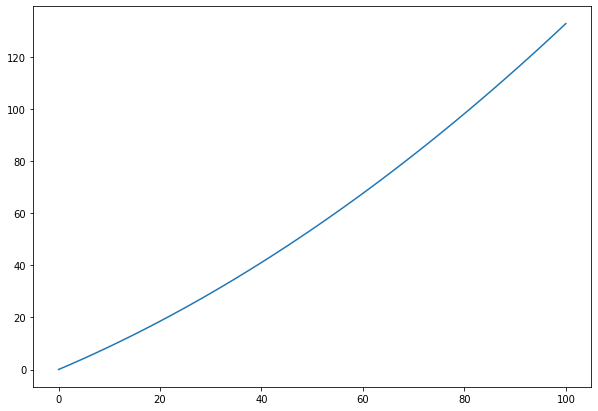

In [25]:
x = np.linspace(0,100,100)
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(x,f_num(x,81))
plt.show()